In [159]:
import keyboard
from time import clock, perf_counter
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (18,1)

def run(f):
    f()
    return f

In [79]:
pressed = keyboard.is_pressed
now = perf_counter

In [184]:
def showclean():
    plt.tick_params(axis='y', which='both', 
                left=False, right=False, labelleft=False)
    plt.show()
    

def go(scale=1, pattern=10):
    hits = []

    down = False

    count = 0
    while True:
        if pressed('q'):
            break

        p = pressed(' ')
        if p and down:
            continue
        elif not p and down:
            down = False
        elif p and not down:
            down = True
            hits.append(perf_counter())
            count += 1
            if count == pattern:
                count = 0
                break

    deltas = [b-a for a,b in zip(hits, hits[1:])]
    
    deltas = np.array(deltas) / (min(deltas)*scale)
    
    new = [0]
    for skip in deltas:
        new.append(new[-1] + skip)

    plt.scatter(new, [1]*len(hits))
    showclean()
    print(' '.join('{:.2f}'.format(d) for d in deltas))

    plt.hist(deltas, bins=50)
    showclean()
    print(' '.join('{:.2f}'.format(d) for d in sorted(deltas)))
    
    return deltas
    

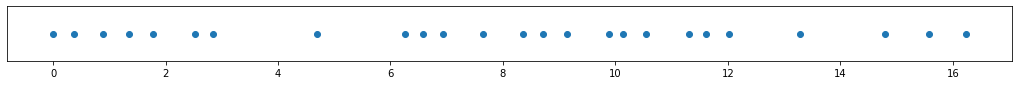

0.38 0.52 0.45 0.43 0.75 0.32 1.84 1.57 0.33 0.35 0.71 0.71 0.34 0.43 0.75 0.25 0.42 0.75 0.31 0.40 1.26 1.51 0.78 0.65


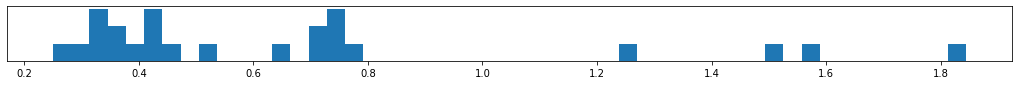

0.25 0.31 0.32 0.33 0.34 0.35 0.38 0.40 0.42 0.43 0.43 0.45 0.52 0.65 0.71 0.71 0.75 0.75 0.75 0.78 1.26 1.51 1.57 1.84


In [185]:
d = go(pattern=25, scale=4)

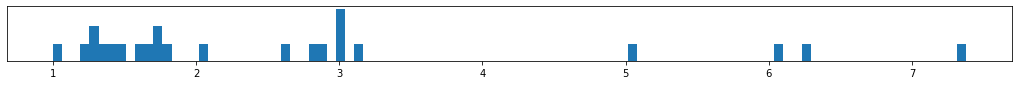

In [190]:
plt.hist(d/d.min(), bins=100); showclean()

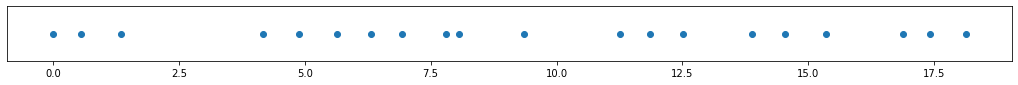

0.56 0.79 2.82 0.71 0.77 0.67 0.62 0.87 0.25 1.30 1.91 0.60 0.65 1.37 0.66 0.81 1.52 0.54 0.71


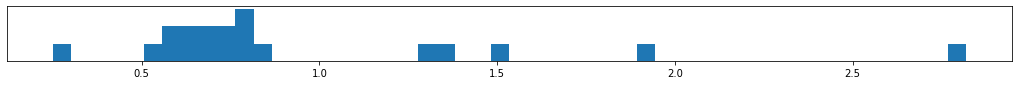

0.25 0.54 0.56 0.60 0.62 0.65 0.66 0.67 0.71 0.71 0.77 0.79 0.81 0.87 1.30 1.37 1.52 1.91 2.82


In [183]:
go(pattern=20, scale=4)

In [199]:
d = np.array([0.56, 0.79, 2.82, 0.71, 0.77, 0.67, 0.62, 0.87, 0.25, 
              1.30, 1.91, 0.60, 0.65, 1.37, 0.66, 0.81, 1.52, 0.54, 0.71])
d / .955

array([0.58638743, 0.82722513, 2.95287958, 0.7434555 , 0.80628272,
       0.70157068, 0.64921466, 0.91099476, 0.2617801 , 1.36125654,
       2.        , 0.62827225, 0.68062827, 1.43455497, 0.69109948,
       0.84816754, 1.59162304, 0.56544503, 0.7434555 ])

In [212]:
np.mean(d[:2]), np.mean(d[3:7]), np.mean(d[7:10])

(0.675, 0.6925, 0.8066666666666666)

In [227]:
np.mean(d[11:13]), np.mean(d[14:16]), np.mean(d[17:20])

(0.625, 0.7350000000000001, 0.625)

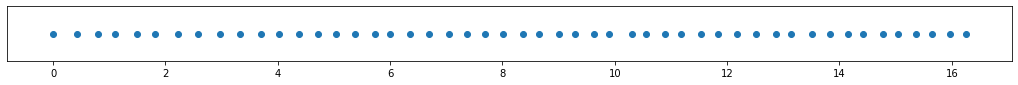

0.42 0.39 0.30 0.39 0.31 0.41 0.35 0.40 0.35 0.37 0.32 0.35 0.34 0.33 0.34 0.36 0.27 0.35 0.34 0.35 0.32 0.33 0.31 0.35 0.30 0.35 0.28 0.33 0.27 0.41 0.25 0.34 0.28 0.35 0.31 0.34 0.34 0.35 0.28 0.37 0.32 0.31 0.28 0.35 0.28 0.31 0.27 0.33 0.28


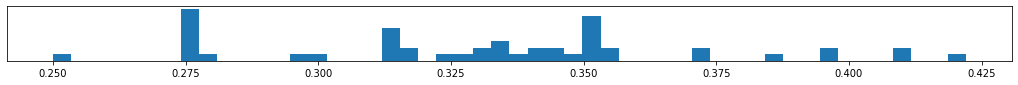

0.25 0.27 0.27 0.27 0.28 0.28 0.28 0.28 0.28 0.28 0.30 0.30 0.31 0.31 0.31 0.31 0.31 0.32 0.32 0.32 0.33 0.33 0.33 0.33 0.34 0.34 0.34 0.34 0.34 0.34 0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.36 0.37 0.37 0.39 0.39 0.40 0.41 0.41 0.42


array([0.4220652 , 0.38696837, 0.2993347 , 0.39493319, 0.31485461,
       0.4115653 , 0.35057254, 0.39733112, 0.35306338, 0.37277745,
       0.31620842, 0.35060425, 0.33864534, 0.33069748, 0.33556044,
       0.35573266, 0.27415647, 0.34828793, 0.34086581, 0.35263742,
       0.32374704, 0.32608057, 0.31396608, 0.35327033, 0.29632402,
       0.35267257, 0.27707941, 0.3335484 , 0.27432533, 0.40943356,
       0.25      , 0.34348814, 0.27683214, 0.3527205 , 0.31388914,
       0.33589766, 0.34074931, 0.34597381, 0.27677389, 0.37279588,
       0.31602653, 0.31338724, 0.27531857, 0.35266741, 0.27688867,
       0.31420916, 0.27437695, 0.33065226, 0.27937828])

In [229]:
go(pattern=50, scale=4)

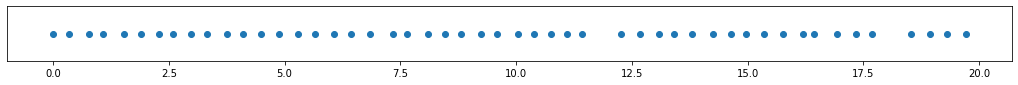

0.35 0.43 0.30 0.45 0.39 0.38 0.30 0.39 0.35 0.43 0.35 0.39 0.38 0.42 0.35 0.41 0.37 0.41 0.50 0.30 0.47 0.35 0.35 0.43 0.35 0.45 0.34 0.38 0.33 0.33 0.85 0.41 0.40 0.33 0.39 0.45 0.39 0.33 0.39 0.40 0.42 0.25 0.49 0.43 0.34 0.85 0.39 0.37 0.41


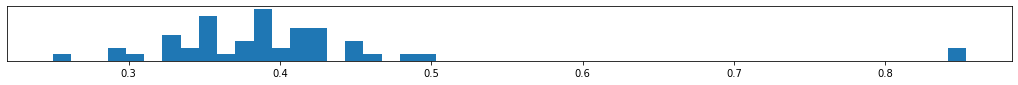

0.25 0.30 0.30 0.30 0.33 0.33 0.33 0.33 0.34 0.34 0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.37 0.37 0.38 0.38 0.38 0.39 0.39 0.39 0.39 0.39 0.39 0.39 0.40 0.40 0.41 0.41 0.41 0.41 0.42 0.42 0.43 0.43 0.43 0.43 0.45 0.45 0.45 0.47 0.49 0.50 0.85 0.85


array([0.35239196, 0.42878055, 0.29687266, 0.44547925, 0.38671142,
       0.37572183, 0.29665812, 0.3918062 , 0.35232827, 0.42894698,
       0.35250864, 0.39177133, 0.38475849, 0.41506286, 0.34968012,
       0.41276685, 0.36592069, 0.41497128, 0.49864327, 0.29911683,
       0.46598595, 0.35211257, 0.35471214, 0.42760187, 0.3524145 ,
       0.44609753, 0.33569465, 0.38155552, 0.33345141, 0.33389072,
       0.84680814, 0.41037299, 0.3982233 , 0.32724768, 0.38902068,
       0.44760186, 0.38966058, 0.33337517, 0.39232848, 0.40286715,
       0.42463854, 0.25      , 0.48502621, 0.42631069, 0.33624111,
       0.85316318, 0.39154401, 0.37322686, 0.40793496])

In [230]:
go(pattern=50, scale=4)

In [231]:
!pip install pydub